In [45]:
import numpy
import numpy as np
# scipy.special for the sigmoid function expit()
import scipy.special
# library for plotting arrays
import matplotlib.pyplot as plt
# ensure the plots are inside this notebook, not an external window
%matplotlib inline

## Neural Network Definition

In [30]:
# neural network class definition
class neuralNetwork:
    
    
    # initialise the neural network
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # set number of nodes in each input, hidden, output layer
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        # link weight matrices, wih and who
        # weights inside the arrays are w_i_j, where link is from node i to node j in the next layer
        # w11 w21
        # w12 w22 etc 
        self.wih = numpy.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes))

        # learning rate
        self.lr = learningrate
        
        # activation function is the sigmoid function
        self.activation_function = lambda x: scipy.special.expit(x)
        
        pass

    
    # train the neural network
    def train(self, inputs_list, targets_list):
        
        # =========  FORWARD PROPAGATION ===========
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        # =========  BACKPROPAGATION PROPAGATION ===========
        # output layer error is the (target - actual)
        output_errors = targets - final_outputs
        # hidden layer error is the output_errors, split by weights, recombined at hidden nodes
        hidden_errors = numpy.dot(self.who.T, output_errors) 
        
        # update the weights for the links between the hidden and output layers
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        
        # update the weights for the links between the input and hidden layers
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))
        
        pass

    
    # query the neural network
    def query(self, inputs_list):
        
        # =========  FORWARD PROPAGATION ===========
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs

## Neural Network Architecture

In [31]:
# number of input, hidden and output nodes
input_nodes = 784 # 28 x 28
hidden_nodes = 200
output_nodes = 10

# learning rate
learning_rate = 0.1

# create instance of neural network
n = neuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)

## Load MNIST Data

In [32]:
# load the mnist training data CSV file into a list
training_data_file = open("data/mnist_train_100.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

## Neural Network Training

In [33]:
# train the neural network

# epochs is the number of times the training data set is used for training
epochs = 5

for e in range(epochs):
    # go through all records in the training data set
    for record in training_data_list:
        # split the record by the ',' commas
        all_values = record.split(',')
        # scale and shift the inputs
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        # create the target output values (all 0.01, except the desired label which is 0.99)
        targets = numpy.zeros(output_nodes) + 0.01
        # all_values[0] is the target label for this record
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)
        pass
    print("epoch",e,"completed")
    pass

epoch 0 completed
epoch 1 completed
epoch 2 completed
epoch 3 completed
epoch 4 completed


In [34]:
# load the mnist test data CSV file into a list
test_data_file = open("data/mnist_test_10.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

In [35]:
# test the neural network

# performance for how well the network performs, initially empty
performance = []

# go through all the records in the test data set
for record in test_data_list:
    # split the record by the ',' commas
    all_values = record.split(',')
    # correct answer is first value
    correct_label = int(all_values[0])
    # scale and shift the inputs
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    # query the network
    outputs = n.query(inputs)
    # the index of the highest value corresponds to the label
    label = numpy.argmax(outputs)
    # append correct or incorrect to list
    if (label == correct_label):
        # network's answer matches correct answer, add 1 to scorecard
        performance.append(1)
    else:
        # network's answer doesn't match correct answer, add 0 to scorecard
        performance.append(0)
        pass
    
    pass

In [36]:
# calculate the performance score, the fraction of correct answers
performance_array = numpy.asarray(performance)
print ("performance = ", performance_array.sum() / performance_array.size)

performance =  0.6


## Ejercicio 1

Vuelva a entrenar la red neuronal con el siguiente dataset:
- https://pjreddie.com/media/files/mnist_train.csv
- https://pjreddie.com/media/files/mnist_test.csv

## Ejercicio 2

Complete la siguiente funcion:

In [53]:
def predict(image_array):
    ## TODO: Develop your code here:
    single_image = image_array.split(',')
    image_as_input = (numpy.asfarray(single_image[1:]) / 255.0 * 0.99) + 0.01
    output = n.query(image_as_input)
    label = numpy.argmax(output)
    return label

image = test_data_list[7]
label = predict(image)
print("The class is:", label)

The class is: 4


## Ejercicio 3

Despliegue la imagen utilizando matplotlib   

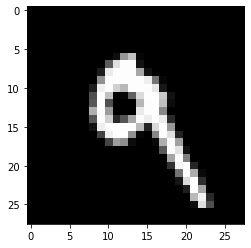

In [60]:
def display(image_array):
    single_image = image_array.split(',')
    image_as_input = (numpy.asfarray(single_image[1:]) / 255.0 * 0.99) + 0.01
    plt.imshow(image_as_input.reshape(28,28), cmap='gray')
    
display(image)